In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from datetime import datetime
import zipfile
import shutil
import os
import glob
import json
from tqdm.notebook import tqdm
#import cv2
import random

In [30]:
!pip install scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, ElasticNetCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, SVR                 # 비선형을 처리하기 위한 알고리즘(커널 방식) -> 고차원(평면->입체)으로 mapping시킴
from sklearn.svm import LinearSVC, LinearSVR     # 선형을 처리하기 위한 알고리즘
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier

In [7]:
# from google.colab import drive

# drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [9]:
# data_path = "/content/gdrive/MyDrive"

# ROOT_DIR = "/content"

In [10]:
HQ_coating

,category_id,part,damage,repair,supercategory_name,HQ
0,as-0000025,Bumper,Crushed,coating,VAN,1.97
1,as-0000025,Door,Separated,coating,VAN,4.15
2,as-0000025,Bumper,Scratched,coating,VAN,1.97
3,as-0000025,Fender,Crushed,coating,VAN,2.80
4,as-0000025,Fender,Separated,coating,VAN,2.80
...,...,...,...,...,...,...
504484,sc-230535,Door,Separated,coating,City car,2.19
504485,sc-230540,Bumper,Separated,coating,Compact car,1.24
504486,sc-230540,Bumper,Crushed,coating,Compact car,1.24
504487,sc-230540,Bumper,Scratched,coating,Compact car,1.24


In [10]:
# shutil.copy(os.path.join(data_path, "HQ_coating2.csv"), ROOT_DIR)

'/content/HQ_coating2.csv'

In [9]:
HQ_coating = pd.read_csv("TalkFile_HQ_coating2.csv")
#/Users/kimdohyun/Final_Project/TalkFile_HQ_coating2.csv

In [11]:
HQ_coating_ML = HQ_coating[['part','damage', 'supercategory_name', 'HQ']]

In [12]:
HQ_coating_ML.head()

,part,damage,supercategory_name,HQ
0,Bumper,Crushed,VAN,1.97
1,Door,Separated,VAN,4.15
2,Bumper,Scratched,VAN,1.97
3,Fender,Crushed,VAN,2.80
4,Fender,Separated,VAN,2.80


In [17]:
HQ_coating_ML = pd.get_dummies(HQ_coating_ML)
HQ_coating_ML

,HQ,part_Bonnet,part_Bumper,part_Door,part_Fender,part_Head lights,part_Rear lamp,part_Rocker panel,part_Roof,part_Side mirror,...,damage_Breakage,damage_Crushed,damage_Scratched,damage_Separated,supercategory_name_City car,supercategory_name_Compact car,supercategory_name_Full-size car,supercategory_name_Mid-size car,supercategory_name_SUV,supercategory_name_VAN
0,1.97,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,4.15,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1.97,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2.80,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,2.80,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504484,2.19,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
504485,1.24,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
504486,1.24,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
504487,1.24,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [20]:
# mac 에서 dummies True, False로 나왔다
HQ_coating_ML.replace(True, 1, inplace=True)
HQ_coating_ML.replace(False, 0, inplace=True)
HQ_coating_ML

,HQ,part_Bonnet,part_Bumper,part_Door,part_Fender,part_Head lights,part_Rear lamp,part_Rocker panel,part_Roof,part_Side mirror,...,damage_Breakage,damage_Crushed,damage_Scratched,damage_Separated,supercategory_name_City car,supercategory_name_Compact car,supercategory_name_Full-size car,supercategory_name_Mid-size car,supercategory_name_SUV,supercategory_name_VAN
0,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.97,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.80,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504484,2.19,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
504485,1.24,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
504486,1.24,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
504487,1.24,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [3]:
HQ_coating_ML.columns = ['HQ', 'Bonnet', 'Bumper', 'Door', 'Fender',
       'Head lights', 'Rear lamp', 'Rocker panel', 'Roof',
       'Side mirror', 'Trunk lid', 'Wheel',
       'Breakage', 'Crushed', 'Scratched', 'Separated',
       'City car', 'Compact car','Full-size car', 'Mid-size car','SUV', 'VAN']


NameError: name 'HQ_coating_ML' is not defined

In [22]:
HQ_coating_ML.head()

,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN
0,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.97,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.80,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
import pandas as pd
df = pd.DataFrame(columns = ['Bonnet', 'Bumper', 'Door', 'Fender',
       'Head lights', 'Rear lamp', 'Rocker panel', 'Roof',
       'Side mirror', 'Trunk lid', 'Wheel',
       'Breakage', 'Crushed', 'Scratched', 'Separated',
       'City car', 'Compact car','Full-size car', 'Mid-size car','SUV', 'VAN'])
df

,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,Trunk lid,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN


In [10]:
df.loc[len(df)] = 0
df

,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,Trunk lid,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['Wheel'] = 1
df['Breakage'] = 1
df

,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,Trunk lid,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
X = HQ_coating_ML.iloc[:,1:]
y = HQ_coating_ML['HQ']
y

0         1.97
1         4.15
2         1.97
3         2.80
4         2.80
          ... 
504484    2.19
504485    1.24
504486    1.24
504487    1.24
504488    1.24
Name: HQ, Length: 504489, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.3)

In [119]:
# ElasticNet을 사용할 것이기 때문에 최적의 l1_ratio를 찾을 필요가 있음.
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train, y_train)
best_l1_ratio = elastic_net_cv.l1_ratio_

# 탐색할 하이퍼파라미터 그리드 생성
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10]

param_grid = {'alpha': alphas, 'l1_ratio': [best_l1_ratio]}

# 그리드 서치 객체 정의
grid_search = GridSearchCV(ElasticNet(max_iter=1000), param_grid=param_grid, cv=5)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적 모델 및 결과 확인
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_

/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+04, tolerance: 2.767e+01
  model = cd_fast.enet_coordinate_descent(
/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.552e+04, tolerance: 2.771e+01
  model = cd_fast.enet_coordinate_descent(
/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [26]:
print(best_model)

ElasticNet(alpha=1e-05)


In [27]:
print(best_params)

{'alpha': 1e-05, 'l1_ratio': 0.5}


In [28]:
print(grid_search.best_score_)

0.2843728689478991


In [31]:
y_test_predict = grid_search.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))  # Loss
r2 = r2_score(y_test, y_test_predict)                       # 설명력

print("RMSE:", rmse)
print("r2:", r2)

RMSE: 1.076022111232729
r2: 0.25899423650099773


In [32]:
print("훈련 점수:", grid_search.score(X_train, y_train))
print("테스트 점수:", grid_search.score(X_test, y_test))

훈련 점수: 0.2799176491701654
테스트 점수: 0.25899423650099773


In [33]:
weights = grid_search.coef_
biases = grid_search.intercept_

print("Weights:", weights)
print("Biases:", biases)

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [35]:
model = ElasticNet(alpha=1e-05, l1_ratio=0.5)
model.fit(X_train, y_train)

params = model.get_params()
params

/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+05, tolerance: 5.134e+01
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1e-05,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [41]:
pred = model.predict(X_test)

In [44]:
# len(pred)
len(y_test)

151347

In [46]:
HQ_test = pd.DataFrame({'pred':pred, 'y_test':y_test})

In [47]:
HQ_test

,pred,y_test
293396,1.929010,1.43
250760,1.575725,1.59
381802,2.484217,1.47
396040,3.420670,3.49
244105,1.882524,1.42
...,...,...
490989,3.388400,4.92
346708,3.420670,3.43
384456,2.557490,3.43
455112,1.974797,1.95


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 실제 타겟값과 예측값을 가지고 있는 리스트나 배열을 사용하여 MAE와 MSE를 계산합니다

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print("MAE:", mae)
print("MSE:", mse)


MAE: 0.6145460914155844
MSE: 1.1578235838617394


In [54]:
HQ_test.sort_values('y_test', inplace=True)
HQ_test

,pred,y_test
296456,2.037810,0.0
296504,2.085146,0.0
470446,2.037810,0.0
480595,1.851782,0.0
387523,2.174096,0.0
...,...,...
117505,2.484217,100.0
117540,1.825758,100.0
245826,3.811890,100.0
29532,2.320229,100.0


In [57]:
HQ_test['y_test'].unique()

array([  0.   ,   0.15 ,   0.16 ,   0.17 ,   0.18 ,   0.19 ,   0.2  ,
         0.21 ,   0.22 ,   0.23 ,   0.24 ,   0.245,   0.25 ,   0.259,
         0.26 ,   0.264,   0.27 ,   0.276,   0.28 ,   0.29 ,   0.3  ,
         0.31 ,   0.312,   0.315,   0.32 ,   0.322,   0.33 ,   0.34 ,
         0.35 ,   0.36 ,   0.364,   0.37 ,   0.38 ,   0.39 ,   0.4  ,
         0.41 ,   0.414,   0.42 ,   0.424,   0.43 ,   0.44 ,   0.45 ,
         0.455,   0.46 ,   0.469,   0.48 ,   0.483,   0.486,   0.49 ,
         0.5  ,   0.51 ,   0.511,   0.52 ,   0.53 ,   0.539,   0.54 ,
         0.55 ,   0.56 ,   0.57 ,   0.574,   0.58 ,   0.586,   0.588,
         0.59 ,   0.6  ,   0.602,   0.606,   0.61 ,   0.62 ,   0.64 ,
         0.65 ,   0.66 ,   0.67 ,   0.68 ,   0.69 ,   0.692,   0.7  ,
         0.707,   0.71 ,   0.72 ,   0.73 ,   0.74 ,   0.75 ,   0.76 ,
         0.77 ,   0.78 ,   0.786,   0.79 ,   0.8  ,   0.804,   0.81 ,
         0.812,   0.82 ,   0.83 ,   0.86 ,   0.861,   0.865,   0.87 ,
         0.871,   0.

In [62]:
print('y=0 :', len(HQ_test[HQ_test['y_test']==0]))
print('y=100 :', len(HQ_test[HQ_test['y_test']==100]))

y=0 : 335
y=100 : 9


In [ ]:
# x = HQ_test.index

# # 선 그래프 그리기
# plt.plot(x, y1, label='pred')
# plt.plot(x, y2, label='y')

# # 그래프 제목과 축 레이블 설정
# plt.title('Line Graph')
# plt.xlabel('Year')
# plt.ylabel('Hq')

# # 범례 표시
# plt.legend()

# # 그래프 출력
# plt.show()

# 그래프로 그리려다가 데이터 이상 감지

In [64]:
y

0         1.97
1         4.15
2         1.97
3         2.80
4         2.80
          ... 
504484    2.19
504485    1.24
504486    1.24
504487    1.24
504488    1.24
Name: HQ, Length: 504489, dtype: float64

In [65]:
# print('y=0 :', len(HQ_test[HQ_test['y_test']==0]))
# print('y=100 :', len(HQ_test[HQ_test['y_test']==100]))
y = HQ_coating_ML[['HQ']]

In [75]:
print('y=0 :', len(HQ_test[HQ_test['y_test']==0]))
print('y=100 :', len(HQ_test[HQ_test['y_test']==100]))

y=0 : 0
y=100 : 0


In [94]:
print(len(HQ_coating_ML))
HQ_coating_ML.head()

504489


,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN
0,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.97,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.80,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [99]:
print(len(HQ_coating_ML[HQ_coating_ML["HQ"]==0]))
print(len(HQ_coating_ML[HQ_coating_ML["HQ"]==100]))

1131
26


In [101]:
HQ_coating_ML = HQ_coating_ML[HQ_coating_ML['HQ'] != 0]
HQ_coating_ML

,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN
0,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.97,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.80,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504484,2.19,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
504485,1.24,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
504486,1.24,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
504487,1.24,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [102]:
HQ_coating_ML = HQ_coating_ML[HQ_coating_ML['HQ'] != 100]
# HQ_test
print(504489 - len(HQ_coating_ML))

1157


In [103]:
X = HQ_coating_ML.iloc[:,1:]
y = HQ_coating_ML['HQ']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.3)

model = ElasticNet(alpha=1e-05, l1_ratio=0.5)
model.fit(X_train, y_train)

/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.298e+04, tolerance: 3.465e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1e-05)

In [104]:
# 훈련 점수: 0.2799176491701654
# 테스트 점수: 0.25899423650099773
print("훈련 점수:", model.score(X_train, y_train))
print("테스트 점수:", model.score(X_test, y_test))

훈련 점수: 0.40723069657364364
테스트 점수: 0.4053279953022251


# 이상치 제거 후 확인

In [108]:
pred = model.predict(X_test)

In [109]:
HQ_test = pd.DataFrame({'pred':pred, 'y_test':y_test})

In [110]:
HQ_test

,pred,y_test
238857,2.774025,3.29
174892,3.769790,3.67
138900,2.177156,1.82
353027,1.534358,1.69
211425,2.074304,0.24
...,...,...
159486,2.514753,3.90
106024,2.177156,0.50
298222,2.048826,2.67
387381,2.514753,3.27


In [111]:
HQ_test_2 = HQ_test.reset_index(drop=True)
HQ_test_2

,pred,y_test
0,2.774025,3.29
1,3.769790,3.67
2,2.177156,1.82
3,1.534358,1.69
4,2.074304,0.24
...,...,...
150995,2.514753,3.90
150996,2.177156,0.50
150997,2.048826,2.67
150998,2.514753,3.27


# 그래프 2트

/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimdohyun/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.

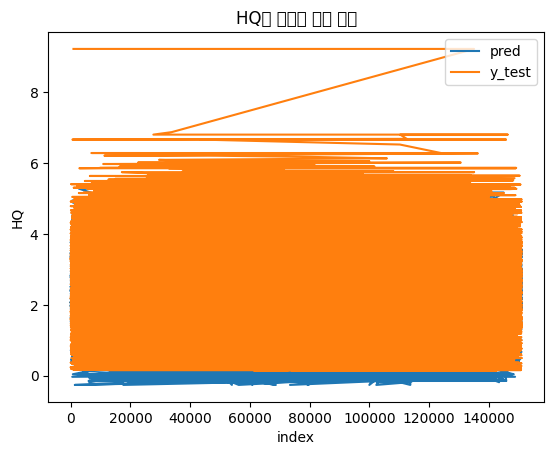

In [112]:
# HQ의 크기에 따른 차이가 있는지 보려함

HQ_test_2.sort_values('y_test', inplace=True)

X = HQ_test_2.index
y1 = HQ_test_2['pred']
y2 = HQ_test_2['y_test']

# 선 그래프 그리기
plt.plot(X, y1, label='pred')
plt.plot(X, y2, label='y_test')

# 그래프 제목과 축 레이블 설정
plt.title('HQ의 크기에 따른 차이')
plt.xlabel('index')
plt.ylabel('HQ')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()

In [113]:
HQ_test_3 = HQ_test_2[HQ_test_2.index % 1000 == 0]


# 그래프 3트

In [116]:
HQ_test_3 = HQ_test_3.reset_index(drop=True)
HQ_test_3

,pred,y_test
0,0.401869,0.35
1,2.177156,0.61
2,2.074304,0.61
3,2.001865,0.61
4,2.074304,0.61
...,...,...
146,3.453528,4.47
147,3.769790,4.52
148,3.381089,4.92
149,2.416837,4.98


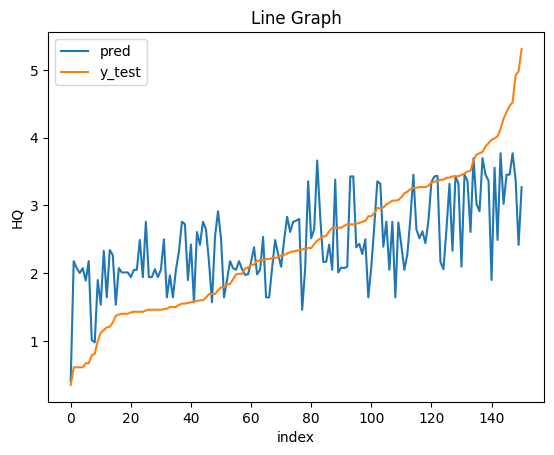

In [117]:
# HQ의 크기에 따른 차이가 있는지 보려함
X = HQ_test_3.index
y1 = HQ_test_3['pred']
y2 = HQ_test_3['y_test']

# 선 그래프 그리기
plt.plot(X, y1, label='pred')
plt.plot(X, y2, label='y_test')

# 그래프 제목과 축 레이블 설정
plt.title('Line Graph')
plt.xlabel('index')
plt.ylabel('HQ')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()

# 2. 범주화해서 boxplot으로 표현

In [120]:
print(len(HQ_coating_ML))
HQ_coating_ML

503332


,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Breakage,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN
0,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.97,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.80,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504484,2.19,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
504485,1.24,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
504486,1.24,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
504487,1.24,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [122]:
HQ_coating_ML['HQ'].max()

9.23

In [141]:
# for i in range(2, 12, 2):
#     print(i, len((HQ_coating_ML[HQ_coating_ML['HQ'] >= i-2]) & (HQ_coating_ML[HQ_coating_ML['HQ'] <= i])))

for i in range(2, 12, 2):
    count = len(HQ_coating_ML[(HQ_coating_ML['HQ'] >= i-2) & (HQ_coating_ML['HQ'] <= i)])
    print(f"{i-2}~{i} : {count}")


0~2 : 196535
2~4 : 273150
4~6 : 35715
6~8 : 197
8~10 : 11


In [139]:
# HQ_coating_ML.groupby(HQ_coating_ML['HQ'])

In [142]:
# 범주화 기준 설정
bins = [0, 2, 4, 6, 8, 10]

# 범주화된 그룹 추가
HQ_coating_ML['Category'] = pd.cut(HQ_coating_ML['HQ'], bins=bins)

HQ_coating_ML


/var/folders/lk/th99q3gs59l3kksh7280m25m0000gn/T/ipykernel_41268/1523686758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HQ_coating_ML['Category'] = pd.cut(HQ_coating_ML['HQ'], bins=bins)


,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN,Category
0,1.97,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,"(0, 2]"
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"(4, 6]"
2,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,"(0, 2]"
3,2.80,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,"(2, 4]"
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"(2, 4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504484,2.19,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,"(2, 4]"
504485,1.24,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,"(0, 2]"
504486,1.24,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,"(0, 2]"
504487,1.24,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,"(0, 2]"


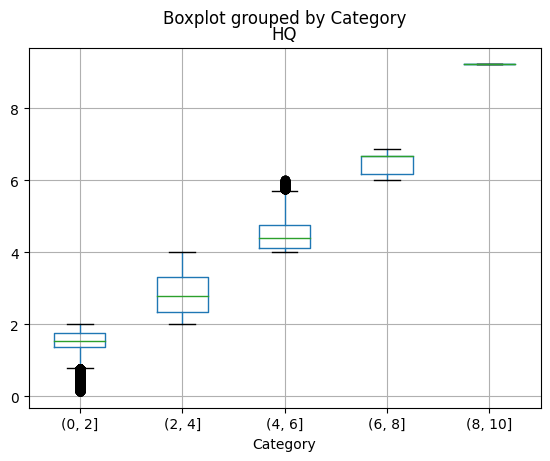

In [143]:
HQ_coating_ML.boxplot(column='HQ', by='Category')
plt.show()

# boxplot 2트

In [146]:
list(range(11))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [147]:
# 범주화 기준 설정
bins = list(range(11))

# 범주화된 그룹 추가
HQ_coating_ML['Category'] = pd.cut(HQ_coating_ML['HQ'], bins=bins)

HQ_coating_ML


/var/folders/lk/th99q3gs59l3kksh7280m25m0000gn/T/ipykernel_41268/464608873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HQ_coating_ML['Category'] = pd.cut(HQ_coating_ML['HQ'], bins=bins)


,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN,Category
0,1.97,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,"(1, 2]"
1,4.15,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"(4, 5]"
2,1.97,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,"(1, 2]"
3,2.80,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,"(2, 3]"
4,2.80,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,"(2, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504484,2.19,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,"(2, 3]"
504485,1.24,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,"(1, 2]"
504486,1.24,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,"(1, 2]"
504487,1.24,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,"(1, 2]"


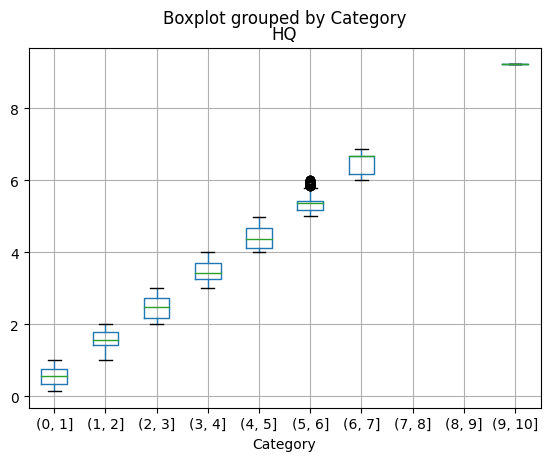

In [148]:
HQ_coating_ML.boxplot(column='HQ', by='Category')
plt.show()

5~6 에서 급격한 상승이 일어난다.
7이후는 이상치로 간주?

In [149]:
HQ_coating_ML[HQ_coating_ML['HQ'] >= 7]

,HQ,Bonnet,Bumper,Door,Fender,Head lights,Rear lamp,Rocker panel,Roof,Side mirror,...,Crushed,Scratched,Separated,City car,Compact car,Full-size car,Mid-size car,SUV,VAN,Category
28568,9.23,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,"(9, 10]"
28569,9.23,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,"(9, 10]"
28571,9.23,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,"(9, 10]"
49390,9.23,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,"(9, 10]"
49391,9.23,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,"(9, 10]"
49393,9.23,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,"(9, 10]"
49397,9.23,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,"(9, 10]"
194418,9.23,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,"(9, 10]"
194419,9.23,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,"(9, 10]"
194420,9.23,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,"(9, 10]"


7이후는 이상치로 간주? 

VAN에서 루프 고장인 경우 매우 오래걸림을 파악.